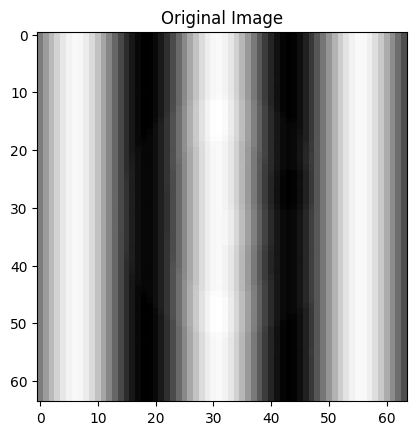

[[0.6147059  0.70882356 0.7970588  ... 0.6647059  0.57058823 0.47941178]
 [0.6147059  0.70882356 0.7970588  ... 0.6647059  0.57058823 0.47941178]
 [0.6147059  0.70882356 0.7970588  ... 0.6647059  0.57058823 0.47941178]
 ...
 [0.6147059  0.70882356 0.7970588  ... 0.6647059  0.57058823 0.47941178]
 [0.6147059  0.70882356 0.7970588  ... 0.6647059  0.57058823 0.47941178]
 [0.6147059  0.70882356 0.7970588  ... 0.6647059  0.57058823 0.47941178]]
(64, 64)


C:\Users\shams\AppData\Local\Temp\ipykernel_12024\159002179.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  ft_result_real[i] = np.trapz(cosine_term, sampled_times)
C:\Users\shams\AppData\Local\Temp\ipykernel_12024\159002179.py:14: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  ft_result_imag[i] = -np.trapz(sine_term, sampled_times)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (65,) + inhomogeneous part.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy.integrate import trapz

def fourier_transform(signal, frequencies, sampled_times):
    num_freqs = len(frequencies)
    ft_result_real = np.zeros(num_freqs)
    ft_result_imag = np.zeros(num_freqs)
    
    for i, freq in enumerate(frequencies):
        cosine_term = signal * np.cos(2 * np.pi * freq * sampled_times)
        sine_term = signal * np.sin(2 * np.pi * freq * sampled_times)
        ft_result_real[i] = np.trapz(cosine_term, sampled_times)
        ft_result_imag[i] = -np.trapz(sine_term, sampled_times)
    
    return ft_result_real, ft_result_imag

def inverse_fourier_transform(ft_signal, frequencies, sampled_times):
    n = len(sampled_times)
    reconstructed_signal = np.zeros(n)
    
    for i, t in enumerate(sampled_times):
        real_part = np.sum(ft_signal[0] * np.cos(2 * np.pi * frequencies * t))
        imag_part = np.sum(ft_signal[1] * np.sin(2 * np.pi * frequencies * t))
        reconstructed_signal[i] = (real_part - imag_part) * (frequencies[1] - frequencies[0])
    
    return reconstructed_signal

def filter_frequencies(ft_data, frequencies, magnitude_spectrum, threshold, window_width):
    filtered_ft_data = np.zeros_like(ft_data)
    filtered_ft_data[0] = ft_data[0].copy()
    filtered_ft_data[1] = ft_data[1].copy()
    
    peak_mask = magnitude_spectrum > threshold
    for i in range(len(peak_mask)):
        if peak_mask[i]:
            start_idx = max(0, i - window_width)
            end_idx = min(len(peak_mask), i + window_width)
            filtered_ft_data[0][start_idx:end_idx] *= 0.01
            filtered_ft_data[1][start_idx:end_idx] *= 0.01
    return filtered_ft_data

def save_plot(x, y, title, xlabel, ylabel, filename):
    plt.figure(figsize=(12, 6))
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    #plt.savefig(os.path.join(IMAGES_DIR, filename))
    plt.show()
    plt.close()

# Load and preprocess the image
image = plt.imread('noisy_image.png')  # Replace with your image file path
# show the image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.show()


# #data = data / np.max(np.abs(data))  
# if len(data.shape) > 1:
#     data = data.mean(axis=1)

# time = np.linspace(0, len(data) / sample_rate, num=len(data))
# save_plot(time, data, "Original Audio Signal (Time Domain)", "Time (s)", "Amplitude", "original_signal.png")

# interval_step = 1
# data_sampled = data[::interval_step]
# sampled_times = np.linspace(0, len(data_sampled) / sample_rate, num=len(data_sampled))
# frequencies = np.linspace(0, sample_rate / (2 * interval_step), num=len(data_sampled))

# ft_data = fourier_transform(data_sampled, frequencies, sampled_times)
# magnitude_spectrum = np.sqrt(ft_data[0]**2 + ft_data[1]**2)
# save_plot(frequencies, magnitude_spectrum, "Frequency Spectrum of the Audio Signal", "Frequency (Hz)", "Magnitude", "frequency_spectrum.png")

# MAGNITUDE_THRESHOLD = np.max(magnitude_spectrum) * 0.1
# WINDOW_WIDTH = 100
# filtered_ft_data = filter_frequencies(ft_data, frequencies, magnitude_spectrum, MAGNITUDE_THRESHOLD, WINDOW_WIDTH)

# filtered_magnitude = np.sqrt(filtered_ft_data[0]**2 + filtered_ft_data[1]**2)
# save_plot(frequencies, filtered_magnitude, "Filtered Frequency Spectrum (Unwanted Frequencies Removed)", "Frequency (Hz)", "Magnitude", "filtered_spectrum.png")

# filtered_data = inverse_fourier_transform(filtered_ft_data, frequencies, sampled_times)

if image.ndim == 3:
    image = np.mean(image, axis=2)  # Convert to grayscale
    
print(image)

denoised_image=[[]]

image = image / 255.0  # Normalize to range [0, 1]
t = np.linspace(0, 1, 64)
frequencies = np.linspace(-50, 50, 64)

for i in range(len(image)):
        
        signal=image[i]
        ft_result=fourier_transform(signal, frequencies, t)

        magnitude_spectrum = np.sqrt(ft_result[0]**2 + ft_result[1]**2)

# Plot amplitude spectrum
# plt.figure(figsize=(10, 4))
# plt.plot(frequencies, magnitude_spectrum)
# plt.title('Amplitude Spectrum (Fourier Transform)')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude')
# plt.grid()
# plt.show()

        MAGNITUDE_THRESHOLD = np.max(magnitude_spectrum) * 0.1
        WINDOW_WIDTH = 100
        filtered_ft_data = filter_frequencies(ft_result, frequencies, magnitude_spectrum, MAGNITUDE_THRESHOLD, WINDOW_WIDTH)

        filtered_magnitude = np.sqrt(filtered_ft_data[0]**2 + filtered_ft_data[1]**2)
        #save_plot(frequencies, filtered_magnitude, "Filtered Frequency Spectrum (Unwanted Frequencies Removed)", "Frequency (Hz)", "Magnitude", "filtered_spectrum.png")

        filtered_data = inverse_fourier_transform(filtered_ft_data, frequencies, t)
        denoised_image.append(filtered_data)


        # save_plot(frequencies, filtered_data, "Reconstructed", "Time (s)", "Amplitude", "reconstructed_signal.png")

print (image.shape)

sample_rate = 1000 


plt.imsave('denoised_image.png', denoised_image, cmap='gray')


plt.figure()
plt.title('Denoised Image')
plt.imshow(denoised_image, cmap='gray')
plt.show()
